# Case Study

# Supervised Learning 

## Veri Keşfi (EDA)

In [1]:
### Gerekli Kütüphanelerin Import edilmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy.stats import boxcox
from scipy.stats.mstats import normaltest

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
#### Datamızın yüklenmesi
df = pd.read_excel('/Users/mertdil/Desktop/linkteraa/Veri-Seti.xlsx')
###,index_col=[0],parse_dates=[0] 
### Datamıza tarihlerin index şeklinde eklenmesi
df.set_index('Date', inplace=True)
df

,Otomotiv Satis,OTV Orani,Faiz,EUR/TL,Kredi Stok
Date,,,,,
2010-01-01,20095.0,37.0,13.1820,2.107385,341244.126
2010-02-01,31172.0,37.0,13.2725,2.073890,351940.949
2010-03-01,51769.0,37.0,12.7275,2.085522,361307.320
2010-04-01,54946.0,37.0,12.0120,2.009010,373575.340
2010-05-01,59377.0,37.0,11.7400,1.948870,387708.051
...,...,...,...,...,...
2023-02-01,NaN,NaN,NaN,NaN,NaN
2023-03-01,NaN,NaN,NaN,NaN,NaN
2023-04-01,NaN,NaN,NaN,NaN,NaN


In [3]:
#### Kredi Stok verisi numeric hala getirilip istatiksel değerler görsellendi.
df['Kredi Stok'] = pd.to_numeric(df['Kredi Stok'], errors='coerce')
print(df.describe())

       Otomotiv Satis   OTV Orani        Faiz      EUR/TL    Kredi Stok
count      149.000000  149.000000  149.000000  149.000000  1.490000e+02
mean     65902.617450   43.697987   16.034380    4.808703  1.787554e+06
std      26175.801077    5.846811    5.319518    3.321767  1.176366e+06
min      14373.000000   37.000000    9.607500    1.927305  3.412441e+05
25%      50008.000000   40.000000   12.715000    2.464018  7.755455e+05
50%      63044.000000   45.000000   14.485000    3.276861  1.474594e+06
75%      79819.000000   50.000000   17.475000    6.380609  2.447479e+06
max     156173.000000   65.000000   32.782500   16.560000  4.862887e+06


In [4]:
### Veri hakkında genel bilgi alındı.
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 162 entries, 2010-01-01 to 2023-06-01
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Otomotiv Satis  149 non-null    float64
 1   OTV Orani       149 non-null    float64
 2   Faiz            149 non-null    float64
 3   EUR/TL          149 non-null    float64
 4   Kredi Stok      149 non-null    float64
dtypes: float64(5)
memory usage: 7.6 KB


In [5]:
# Veride bulunmayan değerlerin sayısı görüntülendi.
df.isnull().sum()

Otomotiv Satis    13
OTV Orani         13
Faiz              13
EUR/TL            13
Kredi Stok        13
dtype: int64

In [6]:
##Eksik veri kontrolü
df = df.dropna()
df.isnull().sum()



Otomotiv Satis    0
OTV Orani         0
Faiz              0
EUR/TL            0
Kredi Stok        0
dtype: int64

Null değerlerin droplanması modelin çalışması için gerekli aşamadır. Model null değişkenlerle çalışmamasından dolayı tahmin edilecek veriler model kurulum aşamasında silinmiştir.

In [7]:
df

,Otomotiv Satis,OTV Orani,Faiz,EUR/TL,Kredi Stok
Date,,,,,
2010-01-01,20095.0,37.0,13.1820,2.107385,3.412441e+05
2010-02-01,31172.0,37.0,13.2725,2.073890,3.519409e+05
2010-03-01,51769.0,37.0,12.7275,2.085522,3.613073e+05
2010-04-01,54946.0,37.0,12.0120,2.009010,3.735753e+05
2010-05-01,59377.0,37.0,11.7400,1.948870,3.877081e+05
...,...,...,...,...,...
2022-01-01,38131.0,60.0,28.2500,15.342386,4.794120e+06
2022-02-01,49652.0,60.0,26.8525,15.470000,4.822579e+06
2022-03-01,64267.0,60.0,25.3950,16.080000,4.791176e+06


In [8]:
##### Otomotiv Satis değişkenine göre diğer değişkenlerin bağımlılık oranları
corr_matrix = df.corr()
corr_matrix['Otomotiv Satis'].sort_values(ascending=False)

Otomotiv Satis    1.000000
OTV Orani         0.090960
Kredi Stok       -0.125566
EUR/TL           -0.167935
Faiz             -0.369273
Name: Otomotiv Satis, dtype: float64

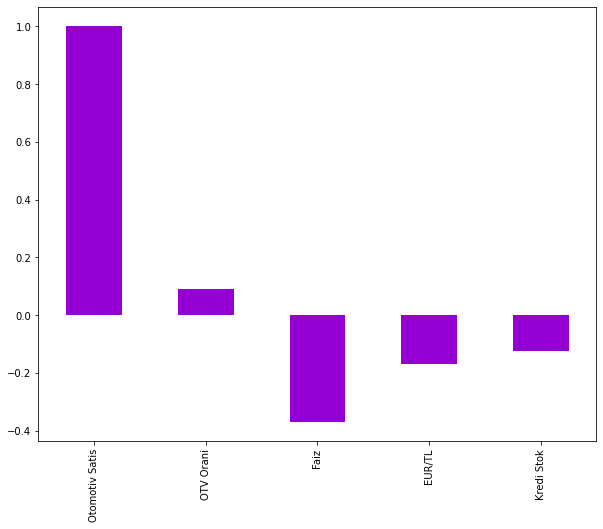

In [9]:
#### Otomotiv Satis değişkeninin korelasyon değerlerinin en yüksek orandan en küçük orana gösterimi
corr_matrix['Otomotiv Satis'].plot(kind='bar',figsize=(10,8),color="darkviolet")

In [10]:
df.columns

Index(['Otomotiv Satis', 'OTV Orani', 'Faiz', 'EUR/TL', 'Kredi Stok'], dtype='object')

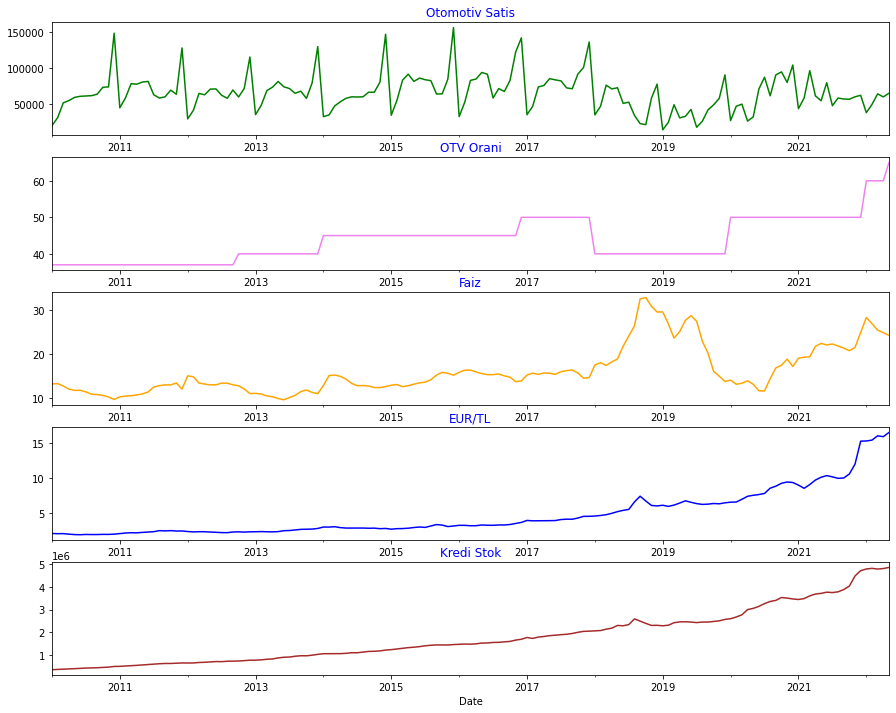

In [11]:
### Time Series analiz
fig, ax = plt.subplots(5, 1, figsize=(15,12),)

df["Otomotiv Satis"].plot(ax=ax[0],color="green").set_title("Otomotiv Satis", color="blue")

df["OTV Orani"].plot(ax=ax[1],color="violet").set_title("OTV Orani", color="blue")

df["Faiz"].plot(ax=ax[2],color="orange").set_title("Faiz", color="blue")

df["EUR/TL"].plot(ax=ax[3],color="blue").set_title("EUR/TL", color="blue")

df["Kredi Stok"].plot(ax=ax[4] ,color="brown").set_title("Kredi Stok", color="blue")

plt.show()

"Otomotiv Satış" verisinin sezonsal olarak bir değişim geçirdiği görülüyor. Bunun yanında diğer değerlerde düzenli yıllara göre düzenli bir artış görülüyor. 

Otomotiv Satış verisinde 2020 yılında bir düşüş yaşanmış bu covidde bulunulan zamana denk geliyor olduğu anlaşılabilir.

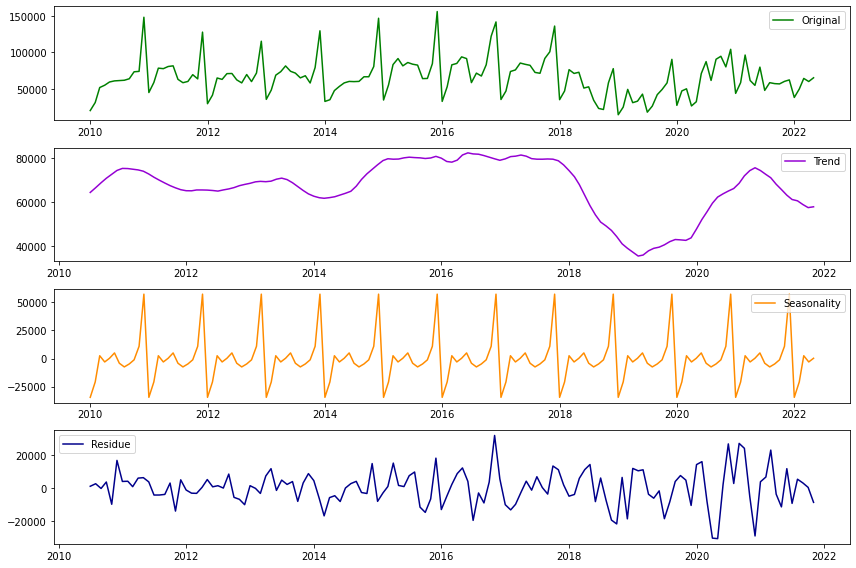

In [12]:
####Sezonsal değişkenlerin Zaman serisi gösterimi
 
plt.rcParams['figure.figsize'] = [12, 8] # grafik boyutu için genişlik ve yükseklik belirleyin

# zaman serisini ayrıştırma
decomposition = sm.tsa.seasonal_decompose(df['Otomotiv Satis'], model='additive', freq=12)

# trend, sezonsellik ve residue elde etme
trend = decomposition.trend
seasonality = decomposition.seasonal
residue = decomposition.resid

# görselleştirme
fig, axs = plt.subplots(4, 1, figsize=(12, 8))
axs[0].plot(df['Otomotiv Satis'], label='Original',color="green")
axs[0].legend(loc='best')
axs[1].plot(trend, label='Trend',color="darkviolet")
axs[1].legend(loc='best')
axs[2].plot(seasonality, label='Seasonality',color="darkorange")
axs[2].legend(loc='best')
axs[3].plot(residue, label='Residue',color="darkblue")
axs[3].legend(loc='best')
plt.tight_layout()
plt.show()

Otomotiv Verisinde açıkca görüldüğü gibi 2020 yılı dışında sezonsal değişikler meydana geliyor. Bu model oluşturmamızda yarar sağlayacak bir çıkarımdır.

### Veri Ön İşleme

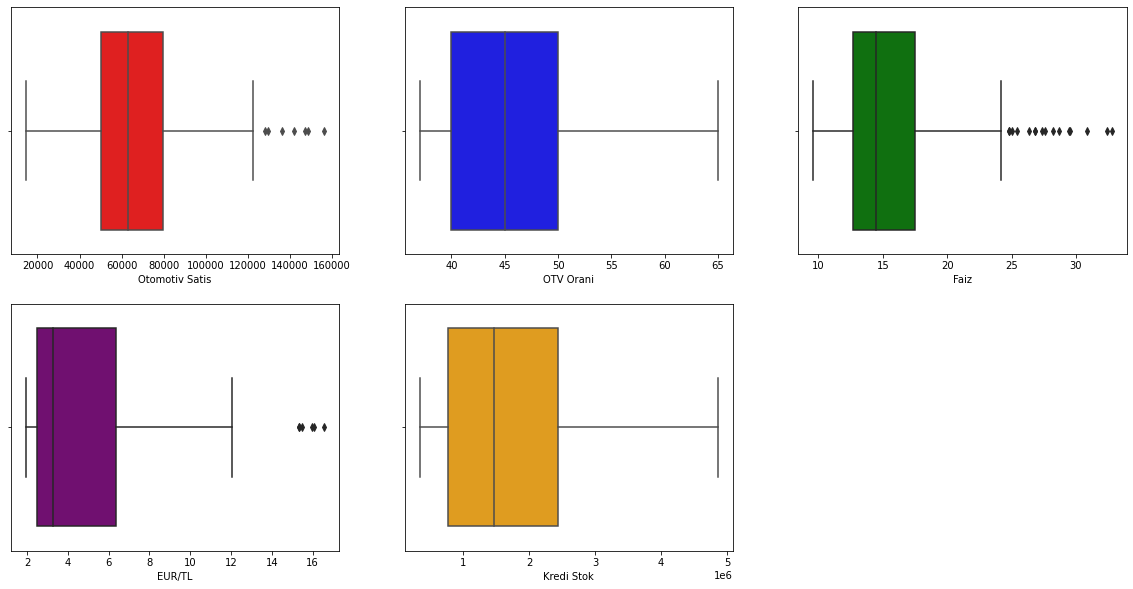

In [13]:
####Box plot aykırı değerlerin bulunmasında önemli bir aşamadır.
features = ['Otomotiv Satis', 'OTV Orani', 'Faiz', 'EUR/TL', 'Kredi Stok']

plt.subplots(figsize=(20,10))

colors = ['red', 'blue', 'green', 'purple', 'orange'] # her grafiğe farklı bir renk atayın
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col], color=colors[i]) # renkleri grafiklerle eşleştirin
plt.show()


Aykırı değerlerin tesbiti için kutu grafikleri önemli bir analiz sunar. 

Aşağıdaki yöntem raw olarak verilen Z score yöntemi ile verimizde aykırı değerlerin çıkarılmasını sağlar.

Aşağıda bulunan Qunatile yöntemi kullanılmuştur.Çünkü verileri kaybetmeden ortalama göre değiştirmemizde olanak sağlar,Z score aksine aynı sayıda veri elimizde bulunur. Z score yöntemi ile eşik değer dışındaki değerler dışlanır.

In [14]:
###Quantile Metodu Uygulanması

def remove_outliers(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # aykırı değerleri median ile değiştir
        median = data[col].median()
        data.loc[data[col] > upper_bound, col] = median
        data.loc[data[col] < lower_bound, col] = median
        
    return data

# Aykırı değerleri ortadan kaldırmak istediğiniz sütunları seçin
columns = ['Otomotiv Satis', 'Faiz', 'EUR/TL']

# Aykırı değerleri ortadan kaldırın
df= remove_outliers(df, columns)

# Düzenlenmiş verileri yazdırın
print(df.describe())

       Otomotiv Satis   OTV Orani        Faiz      EUR/TL    Kredi Stok
count      149.000000  149.000000  149.000000  149.000000  1.490000e+02
mean     62238.167785   43.697987   14.589347    4.304889  1.787554e+06
std      20016.108498    5.846811    3.235646    2.445039  1.176366e+06
min      14373.000000   37.000000    9.607500    1.927305  3.412441e+05
25%      50008.000000   40.000000   12.715000    2.464018  7.755455e+05
50%      63044.000000   45.000000   14.485000    3.276861  1.474594e+06
75%      74096.000000   50.000000   15.620000    6.117077  2.447479e+06
max     122309.000000   65.000000   24.202500   12.033050  4.862887e+06


Bu kod bloğu, veri setindeki Otomotiv Satis, Faiz ve EUR/TL sütunlarındaki outlier değerleri belirler. Belirli bir eşik değerinden büyük veya küçük olan değerler outlier olarak kabul edilir ve veri setinden silinir.

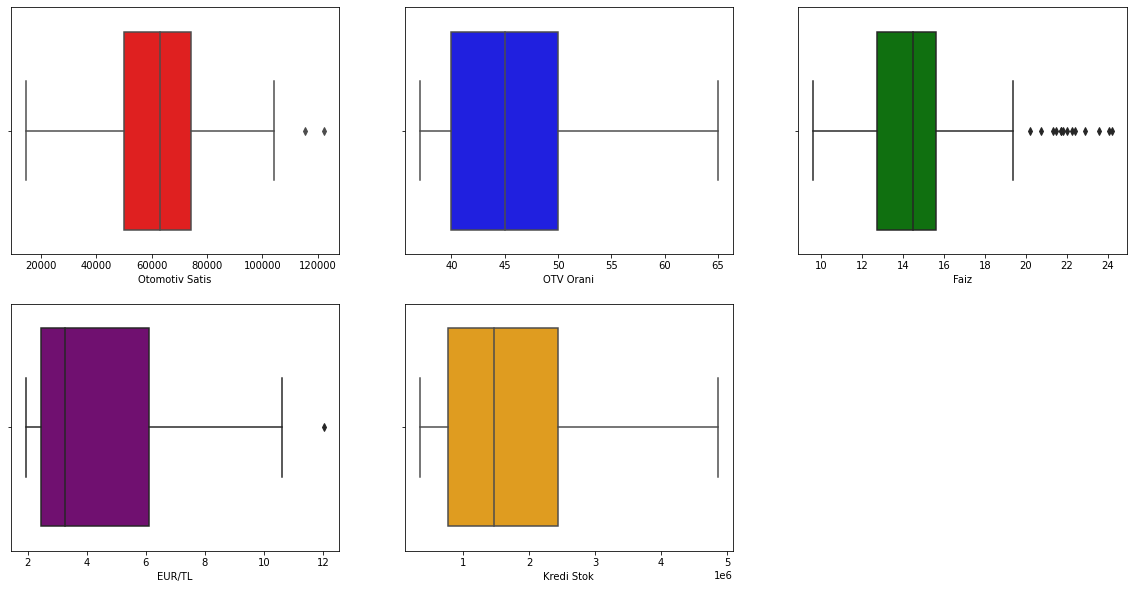

In [15]:
###After removing Outlier varianbles 
features = ['Otomotiv Satis', 'OTV Orani', 'Faiz', 'EUR/TL', 'Kredi Stok']

plt.subplots(figsize=(20,10))

colors = ['red', 'blue', 'green', 'purple', 'orange'] # her grafiğe farklı bir renk atayın
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col], color=colors[i]) # renkleri grafiklerle eşleştirin
plt.show()


Kutu grafiklerin yeniden gösterimi ile aykırı değerlerin büyük oranda azaltıldığı görülebilir.

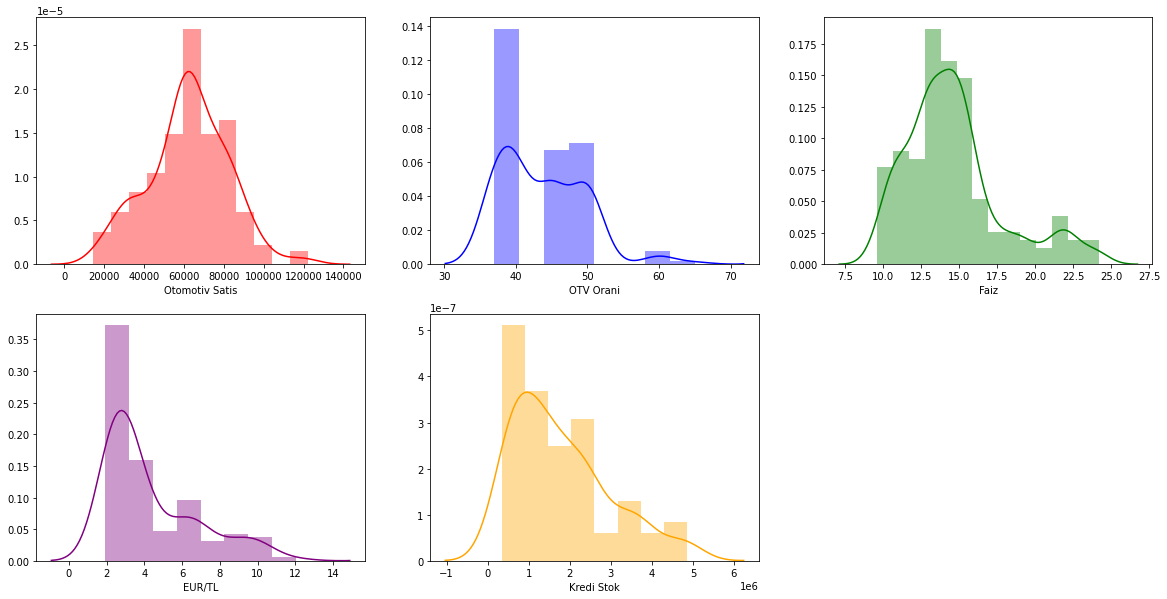

In [16]:
plt.subplots(figsize=(20,10))

colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown'] # her grafiğe farklı bir renk atayın
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(df[col], color=colors[i]) # renkleri grafiklerle eşleştirin
plt.show()

Dağılım grafikleri dağılımlarımızı açıkca görmemizde olanak sağlar. Otomativ Satış verisi normal dağılım sağladığı görülebilir. Diğer grafiklerimiz sağ tarafa doğru yönelim göstermiştir.

In [17]:
df.columns

Index(['Otomotiv Satis', 'OTV Orani', 'Faiz', 'EUR/TL', 'Kredi Stok'], dtype='object')

In [18]:
print("normal dağılım testi:")
print("Euro:",normaltest(df["EUR/TL"].values))
print('Faiz:',normaltest(df["Faiz"].values))
print("Kredi:",normaltest(df["Kredi Stok"].values))
print("Otomotiv:",normaltest(df['Otomotiv Satis'].values))
print("OTV:",normaltest(df['OTV Orani'].values))

normal dağılım testi:
Euro: NormaltestResult(statistic=28.325136018178576, pvalue=7.067647226629048e-07)
Faiz: NormaltestResult(statistic=25.83712619793172, pvalue=2.452106519460383e-06)
Kredi: NormaltestResult(statistic=16.780909631298886, pvalue=0.0002270240008059065)
Otomotiv: NormaltestResult(statistic=0.27523459678681594, pvalue=0.8714321264135516)
OTV: NormaltestResult(statistic=17.229653118167587, pvalue=0.00018139627429984012)


p-value değeri 0.05'ten büyükse, örneklemin normal dağılım varsayımı sağlandığı kabul edilebilir.

P value değeri çok küçük olan EUR/TL, Faiz değişkenlerine BOX-COX yöntemi uygulanıp normal dağılım göstermesi sağlanmıştır.

In [19]:
cp_result=boxcox(df["EUR/TL"])
df["EUR/TL"]=cp_result[0]
normaltest(df["EUR/TL"])

NormaltestResult(statistic=54.076601531106505, pvalue=1.8089025770509412e-12)

In [20]:
cp_result=boxcox(df["Faiz"])
df["Faiz"]=cp_result[0]
normaltest(df["Faiz"])


NormaltestResult(statistic=0.4131701982467224, pvalue=0.8133570425404684)

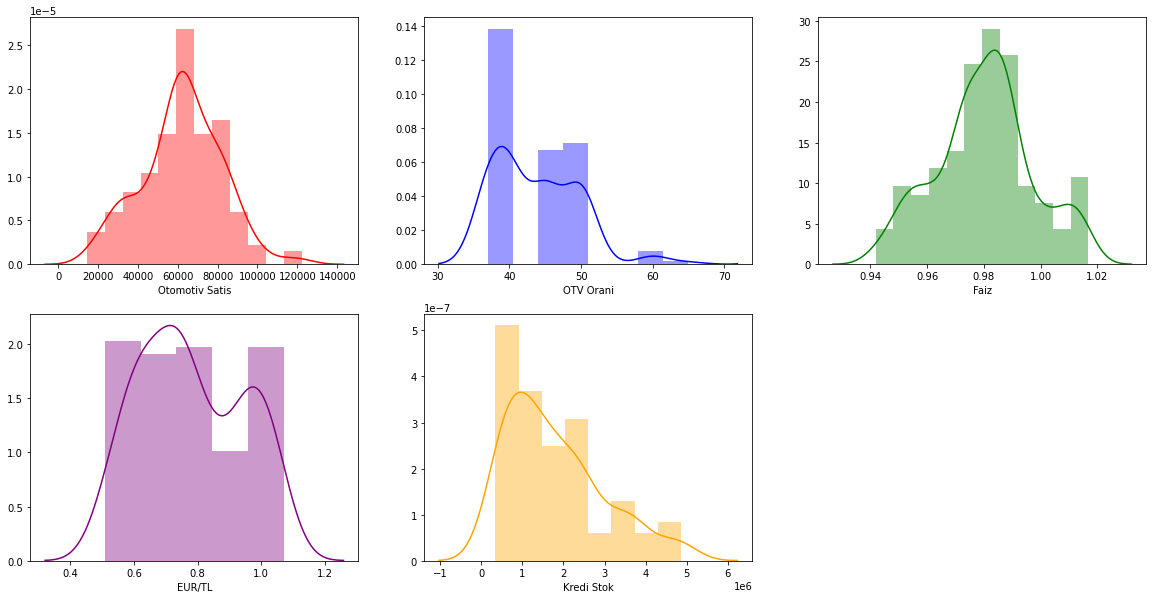

In [21]:
plt.subplots(figsize=(20,10))

colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown'] # her grafiğe farklı bir renk atayın
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(df[col], color=colors[i]) # renkleri grafiklerle eşleştirin
plt.show()

Dağılım grafiklerin tekrar gösterimi ile BOX-COX yönteminin normal dağılmayan grafiklerimizde işe yaradığı görülebilir

### Testing Assumptions for Linear Regression

#### 1.Doğrusallık Varsayımı

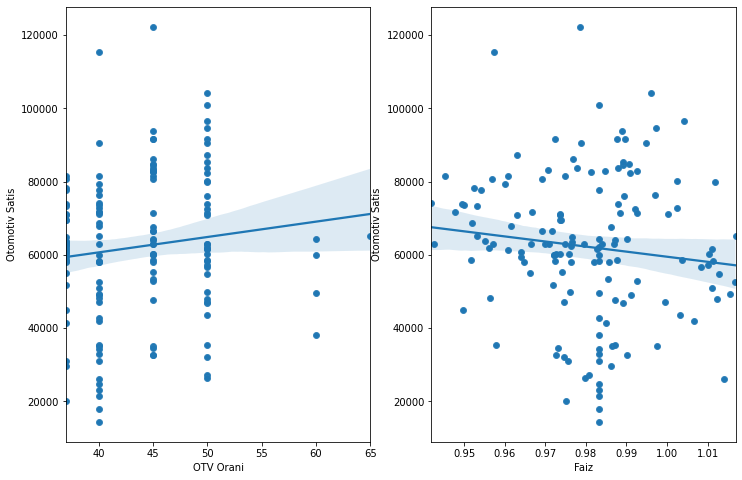

In [22]:
data=df
fig, (ax1, ax2) = plt.subplots(figsize = (12,8), ncols=2,sharey=False)
sns.scatterplot( x = data["OTV Orani"], y = data["Otomotiv Satis"],  ax=ax1)
sns.regplot(x=data["OTV Orani"], y = data["Otomotiv Satis"], ax=ax1)
 
sns.scatterplot(x = data["Faiz"],y = data["Otomotiv Satis"], ax=ax2)
sns.regplot(x=data["Faiz"], y = data["Otomotiv Satis"], ax=ax2);

Korelasyon nedenleri ile Doğrusallık varsayımı için OTV oranı ve Faiz verisi alınmıştır.

#### 2. Normallik Kontrolü

Doğrusal regresyon analizi bağımlı değişken olan "Otomotiv Satışı "nın normal dağılımlı olmasını gerektirmektedir. Bir histogram, kutu grafiği veya Q-Q-Plot hedef değişkenin normal dağılıp dağılmadığını kontrol edebilir. Uyum iyiliği testi, örneğin Kolmogorov-Smirnov testi, bağımlı değişkendeki normalliği kontrol edebilir.

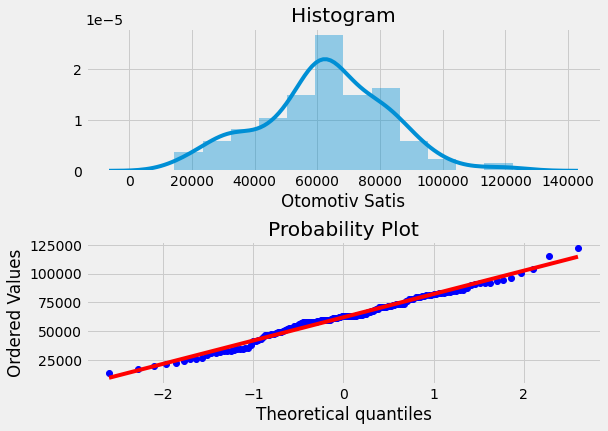

In [23]:
def plotting_2_chart(data, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(data.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(data.loc[:,feature], plot = ax2)

    
    
plotting_2_chart(df, "Otomotiv Satis")
#Let's display all three charts to show how our target variable, 'Otomativ Satis' behaves.

### Heatmap


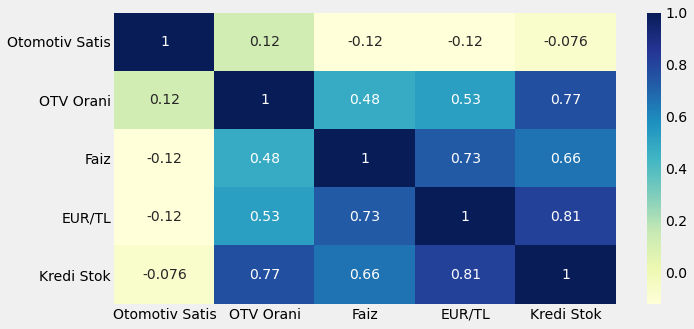

In [24]:
num=data.select_dtypes(include=["int64","float64"])
plt.figure(figsize=(10,5))
sns.heatmap(num.corr(),annot=True,cmap="YlGnBu")
plt.show()

Heatmap yapımız bütün veriler arasındaki korelasyon değerlerimizi verir. Çıkarım ve bağımlılıklarımızı belirlemede önemli bir çalışmadır.

In [25]:
df.columns

Index(['Otomotiv Satis', 'OTV Orani', 'Faiz', 'EUR/TL', 'Kredi Stok'], dtype='object')

# Doğrusal Regresyon Modeli Oluşturulması

## Linear Regression Model-1 

 Modelde kullanılan 'OTV Orani', 'Kredi Stok', 'Faiz' ve 'EUR/TL' özelliklerine ek olarak, daha fazla makroekonomik değişkenler (örneğin, işsizlik oranı, tüketici güven endeksi, vb.) kullanılarak model daha güçlü hale getirilebilir.

In [26]:
df_1 = pd.read_excel('/Users/mertdil/Desktop/linkteraa/Veri-Seti.xlsx')
###,index_col=[0],parse_dates=[0] 
df_1= df_1.dropna()
df_1.set_index('Date', inplace=True)

df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149 entries, 2010-01-01 to 2022-05-01
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Otomotiv Satis  149 non-null    float64
 1   OTV Orani       149 non-null    float64
 2   Faiz            149 non-null    float64
 3   EUR/TL          149 non-null    float64
 4   Kredi Stok      149 non-null    float64
dtypes: float64(5)
memory usage: 7.0 KB


In [27]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149 entries, 2010-01-01 to 2022-05-01
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Otomotiv Satis  149 non-null    float64
 1   OTV Orani       149 non-null    float64
 2   Faiz            149 non-null    float64
 3   EUR/TL          149 non-null    float64
 4   Kredi Stok      149 non-null    float64
dtypes: float64(5)
memory usage: 7.0 KB


In [28]:
#çoklu doğrusal regresyon modeli oluşturulabilir. Bunun için, verileri özellikler (X) ve hedef değişken (y) olarak ayırabiliriz.
#X = df.drop('Otomotiv Satis', axis=1)
X=df_1[["OTV Orani",'Kredi Stok','Faiz','EUR/TL']]
y = df_1['Otomotiv Satis']
X

,OTV Orani,Kredi Stok,Faiz,EUR/TL
Date,,,,
2010-01-01,37.0,3.412441e+05,13.1820,2.107385
2010-02-01,37.0,3.519409e+05,13.2725,2.073890
2010-03-01,37.0,3.613073e+05,12.7275,2.085522
2010-04-01,37.0,3.735753e+05,12.0120,2.009010
2010-05-01,37.0,3.877081e+05,11.7400,1.948870
...,...,...,...,...
2022-01-01,60.0,4.794120e+06,28.2500,15.342386
2022-02-01,60.0,4.822579e+06,26.8525,15.470000
2022-03-01,60.0,4.791176e+06,25.3950,16.080000


In [29]:
#Daha sonra, verilerimizi train ve test setleri olarak bölmemiz gerekiyor. 
#Bu amaçla, train_test_split fonksiyonunu kullanabiliriz. Bu fonksiyon, verileri rastgele bir şekilde train ve test setlerine böler.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.06, random_state=0)

In [30]:
# Verileri ölçeklendirme
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
#  Modeli eğitilmesi
model= LinearRegression()
model.fit(X_train,y_train)

X_test=ss.transform(X_test)
# Modelin Yeni Veriyi Tahminlemesi
car_price_predictions = model.predict(X_test)
car_price_predictions

array([68774.45056433, 42184.47430479, 73785.92070296, 71159.46208168,
       66637.81655021, 26989.23176082, 63692.88673382, 75989.56982823,
       68427.55737451])

In [31]:
#Intercept ve  Coefficient Değerleri
print("Intercept: ", model.intercept_)
print("Coefficients:")
list(zip(X, model.coef_))

Intercept:  65608.42857142857
Coefficients:


[('OTV Orani', 3442.4498083463),
 ('Kredi Stok', 13912.22388822586),
 ('Faiz', -11011.505002606646),
 ('EUR/TL', -12047.000735192116)]

Bu çalışma,Doğrusal varsayımda bulunan parametrelerin değerlerini ve birleştikleri parametreyi belirler

In [32]:
y_pred = car_price_predictions
# Model performansını değerlendirin
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
lm_score=model.score(X_test,y_test)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)
print("determination of prediction Score:",lm_score)

MSE: 1066010217.2154276
RMSE: 32649.811901685247
R2 Score: 0.3632194068204203
determination of prediction Score: 0.3632194068204203


In [33]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
mlr_diff.head()

,Actual value,Predicted value
Date,,
2021-02-01,58504.0,68774.450564
2019-02-01,24875.0,42184.474305
2014-12-01,146989.0,73785.920703
2016-09-01,67593.0,71159.462082
2010-08-01,61764.0,66637.816550


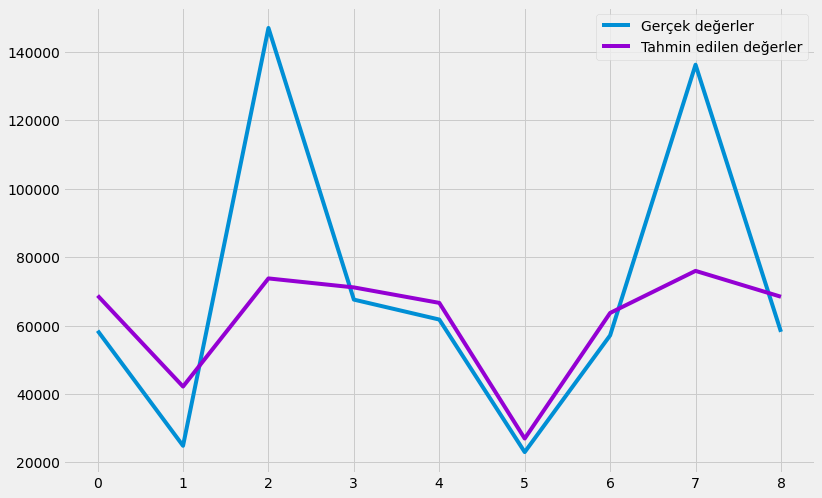

In [34]:
# Sonuçları görselleştirme
plt.plot(y_test.values, label='Gerçek değerler')
plt.plot(y_pred,label='Tahmin edilen değerler',color="darkviolet")
plt.legend()
plt.show()

### Model-1 Forecast Linear Regression Model

Bu kodlar bize, forecast_df adında yeni bir veri çerçevesi döndürür. Bu veri çerçevesinde, Date sütunu Haziran 2022'den Haziran 2023'e kadar olan ayları içerir ve diğer sütunlar ise rasgele değerlerle doludur.

Ardından, bu veri seti üzerinde modelimizi kullanarak tahminler yapabiliriz. Bunun için, önce new_data veri çerçevesindeki girdilerimizi model.predict yöntemiyle kullanarak tahminlerimizi hesaplarız.

In [35]:
# Haziran 2022'den başlayarak 12 ay boyunca tarihler oluşturuyoruz
date_range = pd.date_range(start='2022-06-01', end='2023-06-01', freq='MS')
# oluşturduğumuz tarihleri kullanarak bir dataframe oluşturuyoruz
forecast_df = pd.DataFrame({'Date': date_range})
forecast_df




,Date
0,2022-06-01
1,2022-07-01
2,2022-08-01
3,2022-09-01
4,2022-10-01
5,2022-11-01
6,2022-12-01
7,2023-01-01
8,2023-02-01
9,2023-03-01


In [36]:
# Verilerin istatistiksel davranışlarını kullanarak rastgele değerler oluşturuyoruz
otv_values = np.random.randint(low=37, high=65, size=len(forecast_df))
kredi_values = np.random.normal(loc=1787554.29, scale=1176365.97, size=len(forecast_df))
faiz_values = np.random.normal(loc=16.03, scale=5.32, size=len(forecast_df))
eur_values = np.random.normal(loc=4.81, scale=3.32, size=len(forecast_df))

# Oluşturduğumuz rastgele değerleri dataframe'e ekliyoruz
forecast_df['OTV Orani'] = otv_values
forecast_df['Kredi Stok'] = kredi_values
forecast_df['Faiz'] = faiz_values
forecast_df['EUR/TL'] = eur_values
forecast_df.columns


Index(['Date', 'OTV Orani', 'Kredi Stok', 'Faiz', 'EUR/TL'], dtype='object')

Modelin Otomotiv satis verisini tahmin etmesi için verimizin istatiklerine uygun Bağımsız değişkenler verildi

In [37]:
# Özellikleri ölçeklendiriyoruz
forecast_df_scaled = ss.transform(forecast_df[['OTV Orani', 'Kredi Stok', 'Faiz', 'EUR/TL']])
# Tahmin yaparak sonuçları 'Predicted Otomotiv Satis' sütununda saklıyoruz
forecast_df['Predicted Otomotiv Satis'] = model.predict(forecast_df_scaled)


In [38]:
forecast_df[ 'Predicted Otomotiv Satis']

0      73616.865602
1      58254.708774
2      54667.225700
3      85524.455626
4      71965.184372
5     122620.000525
6      22930.901688
7      78459.471502
8      77840.199381
9      87712.795645
10     34004.750755
11     71263.213838
12     57682.587359
Name: Predicted Otomotiv Satis, dtype: float64

         Date  Predicted Otomotiv Satis
0  2022-06-01              73616.865602
1  2022-07-01              58254.708774
2  2022-08-01              54667.225700
3  2022-09-01              85524.455626
4  2022-10-01              71965.184372
5  2022-11-01             122620.000525
6  2022-12-01              22930.901688
7  2023-01-01              78459.471502
8  2023-02-01              77840.199381
9  2023-03-01              87712.795645
10 2023-04-01              34004.750755
11 2023-05-01              71263.213838
12 2023-06-01              57682.587359


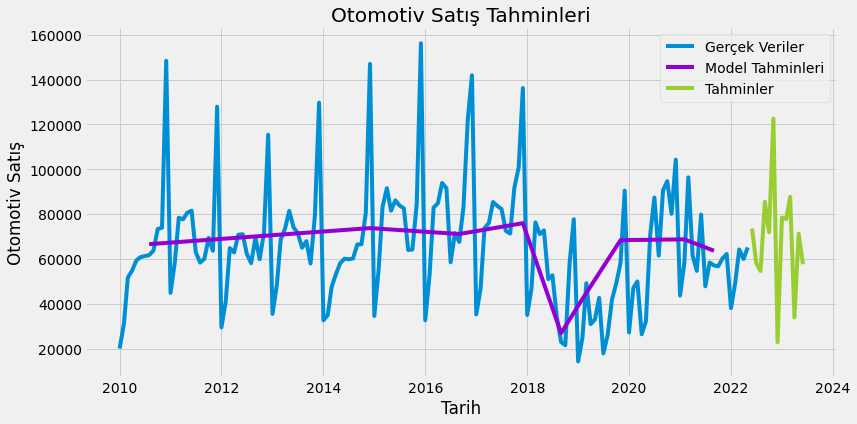

In [39]:
mlr_diff_1=mlr_diff
mlr_diff_1.sort_index(inplace=True)

# Tahmin sonuçlarını yazdırıyoruz
print(forecast_df[['Date', 'Predicted Otomotiv Satis']])
#### Tahmin sonuçlarını görselliyoruz
plt.figure(figsize=(12,6))
plt.plot(df_1.index, df_1['Otomotiv Satis'], label='Gerçek Veriler')
plt.plot(mlr_diff.index, mlr_diff['Predicted value'],color="darkviolet", label='Model Tahminleri')
plt.plot(forecast_df['Date'],forecast_df[ 'Predicted Otomotiv Satis'], label='Tahminler',color="yellowgreen")
plt.legend()
plt.title('Otomotiv Satış Tahminleri')
plt.xlabel('Tarih')
plt.ylabel('Otomotiv Satış')
plt.show()

### Modelin Optimizasyonu (Ridge Regression & Feature Selection)

In [40]:
# Ridge Regresyon modelini kullanarak optimize edilmiş model

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Ridge regresyon modeli için hiperparametre ayarlaması yapalım
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
ridge = Ridge()
ridge_cv = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5)
ridge_cv.fit(X_train, y_train)
print('En iyi parametreler:', ridge_cv.best_params_)

# En iyi parametreleri kullanarak modeli eğitelim
ridge_model = Ridge(alpha=ridge_cv.best_params_['alpha'])
ridge_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapalım
y_pred = ridge_model.predict(X_test)

# Model performansını değerlendirelim
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
lm_score = ridge_model.score(X_test, y_test)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)
print("Determination of prediction Score:", lm_score)

# Öznitelik seçimi yaparak modeli optimize edelim
from sklearn.feature_selection import SelectKBest, f_regression

# F-regresyon testi kullanarak en iyi 2 özelliği seçelim
selector = SelectKBest(f_regression, k=2)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Seçilen özellikleri kullanarak modeli eğitelim
ridge_model_selected = Ridge(alpha=ridge_cv.best_params_['alpha'])
ridge_model_selected.fit(X_train_selected, y_train)

# Test seti üzerinde tahmin yapalım
y_pred_selected = ridge_model_selected.predict(X_test_selected)

# Model performansını değerlendirelim
mse_selected = mean_squared_error(y_test, y_pred_selected)
rmse_selected = np.sqrt(mse_selected)
r2_selected = r2_score(y_test, y_pred_selected)
lm_score_selected = ridge_model_selected.score(X_test_selected, y_test)

print("MSE after feature selection:", mse_selected)
print("RMSE after feature selection:", rmse_selected)
print("R2 Score after feature selection:", r2_selected)
print("Determination of prediction Score after feature selection:", lm_score_selected)


En iyi parametreler: {'alpha': 1}
MSE: 1071231963.7398306
RMSE: 32729.68016555968
R2 Score: 0.3601001995224561
Determination of prediction Score: 0.3601001995224561
MSE after feature selection: 1252157977.1092687
RMSE after feature selection: 35385.84430403305
R2 Score after feature selection: 0.25202414897957026
Determination of prediction Score after feature selection: 0.25202414897957026


Burda modelin optimizasyonu için ridge regression ve feature selection kullanılmaya çalışıldı.

Ridge regression ile modelin geliştirilmesi sağlanmaya çalışıldı ancak score'değerleri ridge regression ve feature selection aşamsından önce daha iyi çalıştığı için modele eklenmemiştir.

## Linear Regression Model-2 ( Mevsimellik Verileri Eklenmesi)

In [41]:
#monthly_mean_sales = df.resample('M').mean()
df_2=df_1

Bu amaçla, aylık bazda ortalama otomotiv satışlarına bakabiliriz ve bu verilerdeki mevsimsellik desenlerini görselleştirebiliriz. Bunu yapmak için, öncelikle aylık ortalama otomotiv satışlarını hesaplayalım:

In [42]:
df_2['Month'] = df_1.index.month
dummies = pd.get_dummies(df_2['Month'], prefix='Month', drop_first=True)
df_2 = pd.concat([df_2, dummies], axis=1)
df_2.head()


,Otomotiv Satis,OTV Orani,Faiz,EUR/TL,Kredi Stok,Month,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
Date,,,,,,,,,,,,,,,,,
2010-01-01,20095.0,37.0,13.1820,2.107385,341244.126,1,0,0,0,0,0,0,0,0,0,0,0
2010-02-01,31172.0,37.0,13.2725,2.073890,351940.949,2,1,0,0,0,0,0,0,0,0,0,0
2010-03-01,51769.0,37.0,12.7275,2.085522,361307.320,3,0,1,0,0,0,0,0,0,0,0,0
2010-04-01,54946.0,37.0,12.0120,2.009010,373575.340,4,0,0,1,0,0,0,0,0,0,0,0
2010-05-01,59377.0,37.0,11.7400,1.948870,387708.051,5,0,0,0,1,0,0,0,0,0,0,0


Ardından, Haziran, Temmuz ve Ağustos aylarını temsil eden sezonsal değişkenleri oluşturabiliriz:

In [43]:
df_2['Season_JJA'] = ((df_2['Month'] == 6) | (df_2['Month'] == 7) | (df_2['Month'] == 8)).astype(int)
df_2.columns


Index(['Otomotiv Satis', 'OTV Orani', 'Faiz', 'EUR/TL', 'Kredi Stok', 'Month',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Season_JJA'],
      dtype='object')

Bu değişkenleri modelimize eklemek için, öncelikle verilerimizi tekrar train ve test setlerine ayırmamız gerekiyor:

In [44]:
X = df_2.drop(['Otomotiv Satis', 'Month'], axis=1)
y = df_2['Otomotiv Satis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_test.columns


Index(['OTV Orani', 'Faiz', 'EUR/TL', 'Kredi Stok', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12', 'Season_JJA'],
      dtype='object')

Ardından, özellikleri ölçeklendirerek modelimizi eğitebiliriz:

In [45]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)
car_price_predictions = model.predict(X_test)
model

LinearRegression()

In [46]:
y_pred = car_price_predictions
# Model performansını değerlendirin
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
lm_score=model.score(X_test,y_test)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)
print("determination of prediction Score:",lm_score)

MSE: 129105609.91228892
RMSE: 11362.46495758244
R2 Score: 0.8342903545377529
determination of prediction Score: 0.8342903545377529


In [47]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
mlr_diff.head()



,Actual value,Predicted value
Date,,
2021-02-01,58504.0,44362.978884
2019-02-01,24875.0,23356.453710
2014-12-01,146989.0,129406.336438
2016-09-01,67593.0,72414.336936
2010-08-01,61764.0,60018.215106


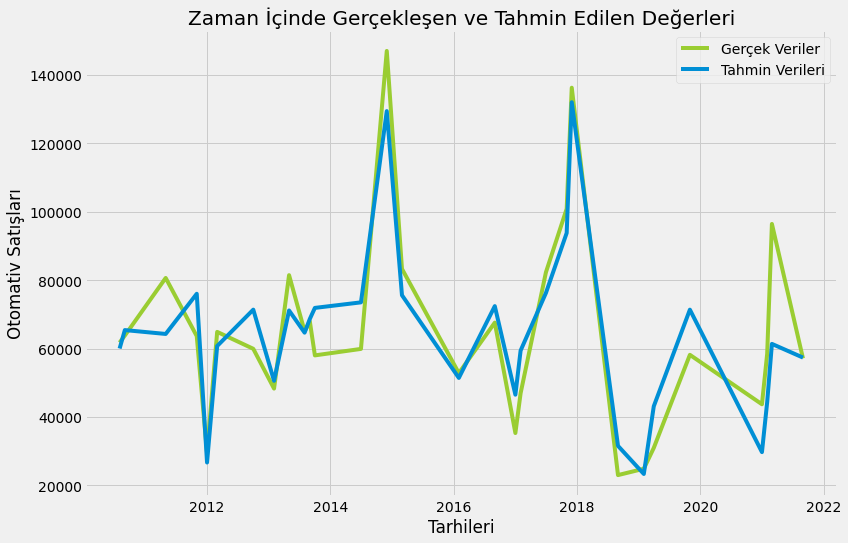

In [48]:
mlr_diff_1=mlr_diff
mlr_diff_1.sort_index(inplace=True)

# Grafiği çizme
plt.plot(mlr_diff_1.index, mlr_diff_1['Actual value'], color="yellowgreen",label='Gerçek Veriler')
plt.plot(mlr_diff_1.index, mlr_diff_1['Predicted value'], label='Tahmin Verileri')
plt.xlabel('Tarhileri')
plt.ylabel('Otomativ Satışları')
plt.title('Zaman İçinde Gerçekleşen ve Tahmin Edilen Değerleri')
plt.legend()
plt.show()

Modelimizde verilerimizi tahmin etme açısından büyük bir ilerleme kaydedildi

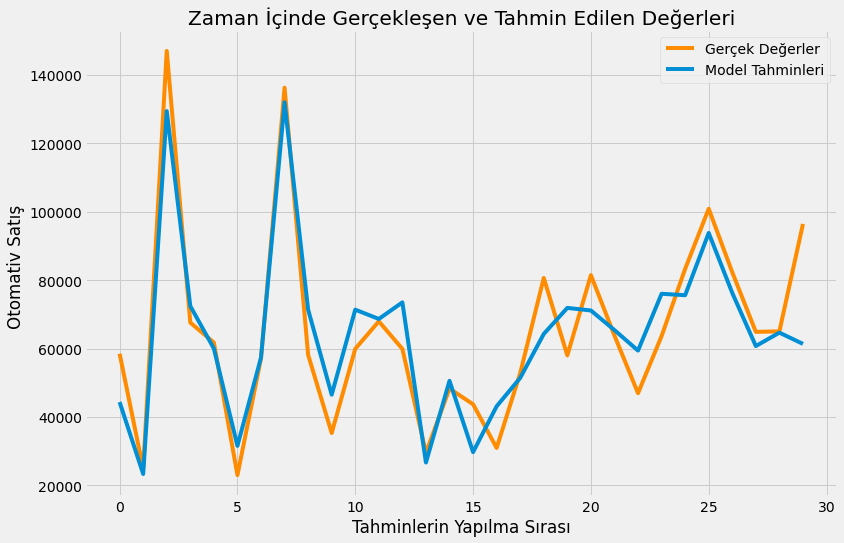

In [49]:
# Sonuçları görselleştirme
plt.plot(y_test.values,color="darkorange", label='Gerçek Değerler')
plt.plot(y_pred,label='Model Tahminleri')
plt.title('Zaman İçinde Gerçekleşen ve Tahmin Edilen Değerleri')
plt.xlabel('Tahminlerin Yapılma Sırası')
plt.ylabel('Otomativ Satış ')
plt.legend()
plt.show()

#### Rigde Regression Model_2

In [50]:
# Ridge Regresyon modelini kullanarak optimize edilmiş model

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Ridge regresyon modeli için hiperparametre ayarlaması yapalım
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
ridge = Ridge()
ridge_cv = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5)
ridge_cv.fit(X_train, y_train)
print('En iyi parametreler:', ridge_cv.best_params_)

# En iyi parametreleri kullanarak modeli eğitelim
ridge_model = Ridge(alpha=ridge_cv.best_params_['alpha'])
ridge_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapalım
y_pred = ridge_model.predict(X_test)

# Model performansını değerlendirelim
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
lm_score = ridge_model.score(X_test, y_test)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)
print("Determination of prediction Score:", lm_score)



En iyi parametreler: {'alpha': 1}
MSE: 131493737.24088338
RMSE: 11467.071868654324
R2 Score: 0.8312251451079772
Determination of prediction Score: 0.8312251451079772


Benzer bir model geliştirilmesi model-2'de de uygulanmaya çalışıldı ancak score'umuzu bu işlemlerden önce daha iyi olduğu için kullanılmadılar.

#### Feature Selection Model_2

In [51]:
# Öznitelik seçimi yaparak modeli optimize edelim
from sklearn.feature_selection import SelectKBest, f_regression

# F-regresyon testi kullanarak en iyi 2 özelliği seçelim
selector = SelectKBest(f_regression, k=2)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Seçilen özellikleri kullanarak modeli eğitelim
ridge_model_selected = Ridge(alpha=ridge_cv.best_params_['alpha'])
ridge_model_selected.fit(X_train_selected, y_train)

# Test seti üzerinde tahmin yapalım
y_pred_selected = ridge_model_selected.predict(X_test_selected)

# Model performansını değerlendirelim
mse_selected = mean_squared_error(y_test, y_pred_selected)
rmse_selected = np.sqrt(mse_selected)
r2_selected = r2_score(y_test, y_pred_selected)
lm_score_selected = ridge_model_selected.score(X_test_selected, y_test)

print("MSE after feature selection:", mse_selected)
print("RMSE after feature selection:", rmse_selected)
print("R2 Score after feature selection:", r2_selected)
print("Determination of prediction Score after feature selection:", lm_score_selected)

MSE after feature selection: 300976017.1217157
RMSE after feature selection: 17348.660384067574
R2 Score after feature selection: 0.6136912321334271
Determination of prediction Score after feature selection: 0.6136912321334271


### Model-2 Forecast with mevsimsel değişkenler


In [52]:
# Haziran 2022'den başlayarak 12 ay boyunca tarihler oluşturuyoruz
date_range = pd.date_range(start='2022-06-01', end='2023-06-01', freq='MS')
# oluşturduğumuz tarihleri kullanarak bir dataframe oluşturuyoruz
forecast_df_2 = pd.DataFrame({'Date': date_range})
forecast_df_2.head()

# Verilerin istatistiksel davranışlarını kullanarak rastgele değerler oluşturuyoruz
otv_values = np.random.randint(low=37, high=65, size=len(forecast_df_2))
kredi_values = np.random.normal(loc=1787554.29, scale=1176365.97, size=len(forecast_df_2))
faiz_values = np.random.normal(loc=16.03, scale=5.32, size=len(forecast_df_2))
eur_values = np.random.normal(loc=4.81, scale=3.32, size=len(forecast_df_2))

# Oluşturduğumuz rastgele değerleri dataframe'e ekliyoruz
forecast_df_2['OTV Orani'] = otv_values
forecast_df_2['Kredi Stok'] = kredi_values
forecast_df_2['Faiz'] = faiz_values
forecast_df_2['EUR/TL'] = eur_values
forecast_df_2.columns

Index(['Date', 'OTV Orani', 'Kredi Stok', 'Faiz', 'EUR/TL'], dtype='object')

In [53]:
forecast_df_2['Month'] = forecast_df_2['Date'].dt.month
dummies = pd.get_dummies(forecast_df_2['Month'], prefix='Month', drop_first=True)
forecast_df_2 = pd.concat([forecast_df_2, dummies], axis=1)
forecast_df_2['Season_JJA'] = ((forecast_df_2['Month'] == 6) | (forecast_df_2['Month'] == 7) | (forecast_df_2['Month'] == 8)).astype(int)
forecast_df_2.columns


Index(['Date', 'OTV Orani', 'Kredi Stok', 'Faiz', 'EUR/TL', 'Month', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Season_JJA'],
      dtype='object')

In [54]:
# Özellikleri ölçeklendiriyoruz
#forecast_df_2 = forecast_df_2.drop(['Predicted Otomotiv Satis', 'Month'], axis=1)
forecast_df_scaled_2 =ss.transform(forecast_df_2[['OTV Orani', 'Faiz', 'EUR/TL', 'Kredi Stok', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12', 'Season_JJA']])

In [55]:

# Tahmin yaparak sonuçları 'Predicted Otomotiv Satis' sütununda saklıyoruz
forecast_df_2['Predicted Otomotiv Satis'] = model.predict(forecast_df_scaled_2)

# Tahmin sonuçlarını yazdırıyoruz
print("Haz’22 – Haz’23 dönemleri için tahminler:")
print(forecast_df_2[['Date', 'Predicted Otomotiv Satis']])




Haz’22 – Haz’23 dönemleri için tahminler:
         Date  Predicted Otomotiv Satis
0  2022-06-01             101917.839204
1  2022-07-01              48332.293821
2  2022-08-01              75607.131342
3  2022-09-01              59232.180992
4  2022-10-01              68773.597968
5  2022-11-01             101969.524927
6  2022-12-01             121445.072510
7  2023-01-01              66894.579041
8  2023-02-01              47512.978396
9  2023-03-01              79140.494763
10 2023-04-01             116311.232418
11 2023-05-01              50175.170530
12 2023-06-01              56044.761531


In [56]:
import plotly.graph_objs as go
import plotly.offline as pyo
data = [go.Scatter(x=forecast_df_2['Date'], y=forecast_df_2['Predicted Otomotiv Satis'], mode='lines', name='Predicted Otomotiv Satis')]
layout = go.Layout(title='Otomotiv Satışı Tahminleri', xaxis=dict(title='Tarih', tickangle=45, tickfont=dict(size=10)), yaxis=dict(title='Otomotiv Satış'))
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)


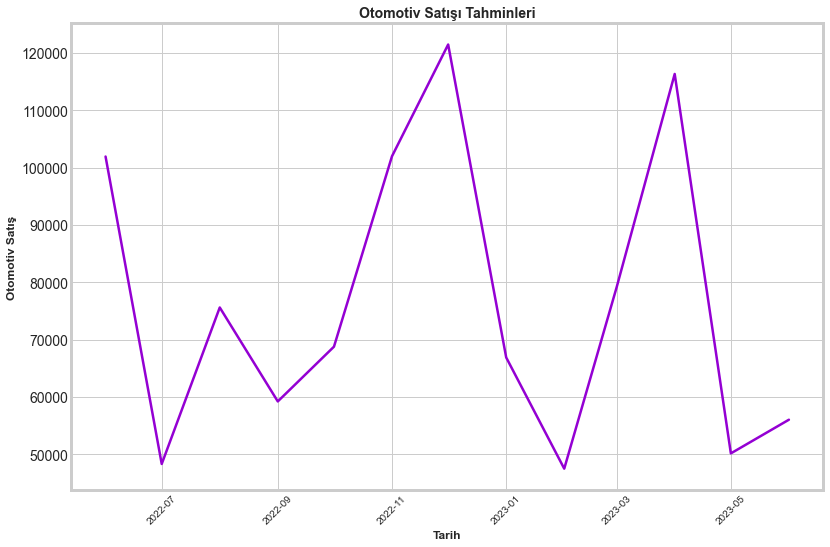

In [57]:
# Grafiği çizme
sns.set_style("whitegrid")
sns.lineplot(x="Date", y="Predicted Otomotiv Satis", data=forecast_df_2, color="darkviolet", linewidth=2.5)
plt.xticks(rotation=45, fontsize=10)
plt.title('Otomotiv Satışı Tahminleri', fontsize=14, fontweight='bold')
plt.xlabel('Tarih', fontsize=12, fontweight='bold')
plt.ylabel('Otomotiv Satış', fontsize=12, fontweight='bold')
plt.show()

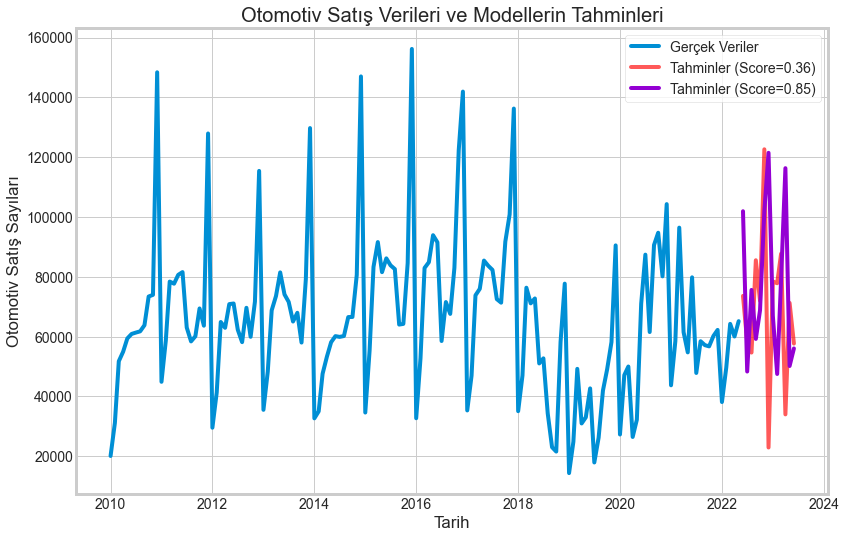

In [58]:

#### Tahmin sonuçlarını görselliyoruz
plt.figure(figsize=(12,8))
plt.plot(df_2.index, df_2['Otomotiv Satis'], label='Gerçek Veriler')
plt.plot(forecast_df['Date'],forecast_df[ 'Predicted Otomotiv Satis'],alpha=0.65,color="red" ,label='Tahminler (Score=0.36)')
plt.plot(forecast_df_2['Date'],forecast_df_2[ 'Predicted Otomotiv Satis'],color='darkviolet', label='Tahminler (Score=0.85)')
plt.legend()
plt.title('Otomotiv Satış Verileri ve Modellerin Tahminleri')
plt.xlabel('Tarih')
plt.ylabel('Otomotiv Satış Sayıları')
plt.show()

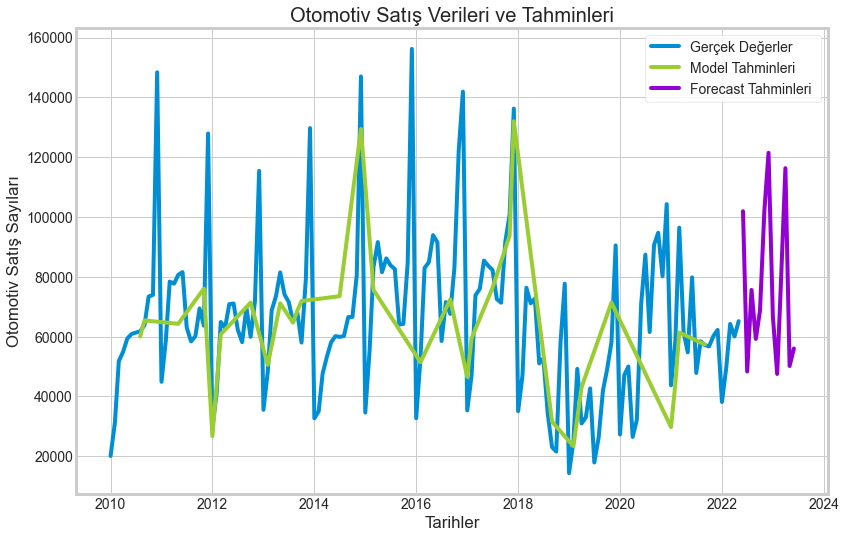

In [59]:

#### Tahmin sonuçlarını görselliyoruz
plt.figure(figsize=(12,8))
plt.plot(df_2.index, df_2['Otomotiv Satis'], label='Gerçek Değerler')
plt.plot(mlr_diff_1.index, mlr_diff_1['Predicted value'],color="yellowgreen", label='Model Tahminleri')
plt.plot(forecast_df_2['Date'],forecast_df_2[ 'Predicted Otomotiv Satis'],color='darkviolet', label="Forecast Tahminleri ")
plt.legend()
plt.title('Otomotiv Satış Verileri ve Tahminleri')
plt.xlabel('Tarihler')
plt.ylabel('Otomotiv Satış Sayıları')
plt.show()

# Modelin Servise Alınması

Servisin Çalışma prensibi:

İkinci modelimiz olan Model-2, mevsimsel değişkenler eklenerek geliştirildi ve Docker imajına taşındı. Dockerfile ile imajın oluşturulma süreci tanımlandı.

Servis haline getirilmiş modelin Python kodu, model-api.py dosyasında yer almaktadır.

Dockerfile dosyası, model-api.py dosyasına bağlanarak veri setiyle birlikte modelin çalışmasını sağlar.

Modelin tahmin çıktıları, oluşturulan container ile görüntülenebilir hale getirilir.

Postman aracılığıyla yapılan HTTP istekleriyle, 2022 Haziran-2023 Haziran ayları için tahmin edilen değerler görüntülenebilir. Bu istekler, GET metodu kullanılarak gerçekleştirilir.



## dockerfile 

## dockerfile kurulumu ve çalıştırılması

## .py dosyası  içine hazırlanan  Flask eklentisi

## Postman

 ## model-api.py ile hazırlanan model-2'i python kodumuzun içeriği

 